## KNN(K-Nearest Neighbour) with Scikit-learn

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Loading DataSet

In [2]:
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
#df['custcat'].value_counts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255DF187D30>]],
      dtype=object)

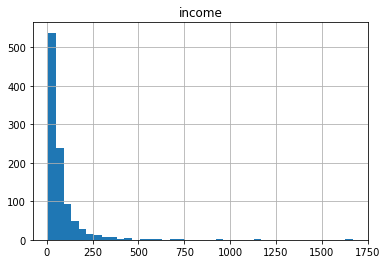

In [7]:
df.hist(column='income', bins=40)

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values

In [13]:
y=df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

## Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:


But why you normalize data in KNN?
the reason is 
For classification algorithms like KNN, we measure the distances between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this miss classification, we should normalize the feature variables.

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [16]:
#train/test split
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=4) #random state means randomly select values
print(train_X.shape,train_y.shape)
print(test_X.shape,test_y.shape)

(800, 11) (800, 1)
(200, 11) (200, 1)


In [17]:
#classification
from sklearn.neighbors import KNeighborsClassifier
#lets take the value of k=4
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(train_X,train_y)
neigh


C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [18]:
#predicting

y_hat=neigh.predict(test_X)

In [19]:
y_hat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

In [21]:
#check the accuracy
from sklearn import metrics
print('train set accuracy :',metrics.accuracy_score(train_y,neigh.predict(train_X)))
print('test set accuracy :',metrics.accuracy_score(test_y,y_hat))

train set accuracy : 0.5475
test set accuracy : 0.32


## What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [22]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfutionMx=[]
for i in range(1,ks):
    #train model
    neigh=KNeighborsClassifier(n_neighbors=i).fit(train_X,train_y)
    yhat=neigh.predict(test_X)
    mean_acc[i-1]=metrics.accuracy_score(test_y,yhat)
    
    std_acc[i-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc    


C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\OwNer\Anaconda3\lib\site-packages\ipykernel

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


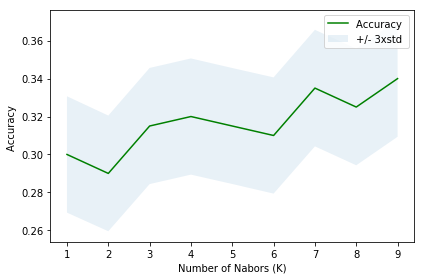

In [25]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()